#  Programming for Data Analysis Project 2 - An analysis of paleo-present climate data

Author: Audrey Allen

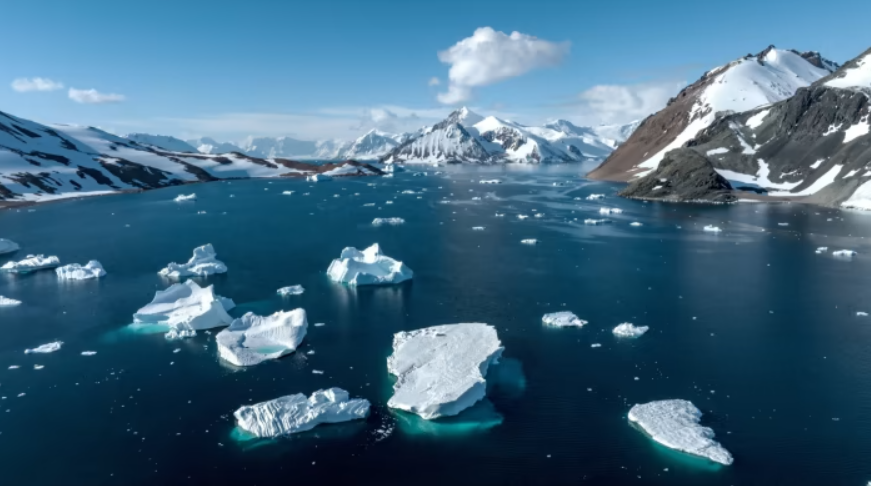


- Analyse CO2 vs Temperature Anomaly from 800kyrs – present

- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)

- Examine Irish context:

- Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)

- Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats

- For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).

- Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue

- Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice-coverage)


Roughwork


In [ ]:
# Delete top number of rows from .txt file  and convert to .csv file

import pandas as pd


columns = ['Bag', 'ztop','Age','Deuterium', 'Temperature']

data = pd.read_csv('Roughwork/NOAATemperature.txt', skiprows=92, delim_whitespace=True, names=columns, engine='python')

display(data)

df = data[['Age', 'Temperature']]

df.to_csv (r'Roughwork/NOAATemperature.csv', index=None)


In [ ]:
# Read in Excel File - Temperature Data

#Calculate Average Temperature anomoly over the years

# Firstly extract two columns from Jousel dataset into a dataframe

# Also rename the age field


import pandas as pd
df = pd.read_excel('Roughwork/Temperature Data - Jousel.xls')

display(df)

df1 = df.rename(columns=({'EDC3béta':'Age'}))

df2 = df1[['Age', 'temp']]

df2.to_csv (r'Roughwork/TemperatureAnomoly.csv', index=None)



Calculate the temperature anomoly from the 800K years ago to now. Jouzels data only goes as far as the year 2000 so I sourced data from 2000 to 2022 from https://en.tutiempo.net/climate/ws-898280.html. This is temperature data from Dome C II in Antartica so from the same location as Jouzels data. 

However the average data per year is in degree celcius and there seems to be quite a significant difference when comparing Jouzels data and this dataset. This difference will be noticable from the year 2001 onwards. (After Jouzels data)

There is not average data for every year in this new Dome C dataset. I convert the average yearly temperature for Dome C from celcius to Kelvin as this is what Jouzel has measured his average temperature as.

In [ ]:
# Import DictWriter class from CSV module
import csv
 
# list of column names
field_names = ['Age', 'Temp']
 
# Below are the years and the values taken from Dome C II - Converted from celcius to Degrees Kelvin from intermittent years from 
# 2001 to 2022

values = [[-51,222.25],[-53,221.25],[-54,222.75],[-60,220.55],[-61,222.95],[-62,221.35],[-63,222.25],[-64,222.25],[-67,221.85], [-68,222.05],[-69,222.95],[-70,222.85],[-72,223.25]] 
     

with open('Roughwork/TemperatureAnomoly.csv', 'a', newline="") as file:
   writer = csv.writer(file)    
   writer.writerows(values)

In [ ]:
# Want to sort the temperature data ascending       

# importing pandas package 
import pandas as pandasForSortingCSV 
  
# assign dataset 
csvData = pandasForSortingCSV.read_csv("Roughwork/TemperatureAnomoly.csv") 
                                         
# displaying unsorted data frame 
print("\nBefore sorting:") 
print(csvData) 
  
# sort data frame 
csvData.sort_values(["Age"],  
                    axis=0, 
                    ascending=[True],  
                    inplace=True) 
  
# displaying sorted data frame 
print("\nAfter sorting:") 
print(csvData) 

In [ ]:
# And then I want to write to a the csv file again but this time the data will be sorted.

df = csvData

df.to_csv (r'Roughwork/TemperatureAnomoly.csv', index=None)

In [ ]:
# The next piece of work is to get the temperature anomoly from 800K years to 2022
# I calculated the average temperature from  age -50 (2000) to 1000 approx 1000 years prior to that (989.8635)
# I then subtracted the average temperature for that period from the average temperature for that year (in kelvin)
# and that was the anomoly for that year
# As I mentioned above the anomoly is larger after 2001 as I have amalgamated two different datasets and even though it is for the 
# same location 'Antartica' there are noticable differences in temperature and therefore the anomoly looks larger after 2001.
# Just something to note - N.B. N.B.

from statistics import mean 

inp_lst = [218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	218.3,	219.2,	220.4,	217.7,	217,	217.4,	217.4,	216.9,	218.2,	216.8,	216.3,	217.8,	217,	218.4,	217.7,	216.7,	216.2,	217.9,	215,	217.8,	218.2,	218.1,	217.4,	217.3,	216,	217.1,	217.6,	216.2,	217,	216.8,	217.4,	216.7,	216.5,	215.9,	216.9,	217.3,	217.6,	215.7,	217.6,	217.5,	216.8,	216.6,	217.8,	215,	216.5,	217,	218.7,	218.1,	216.6,	218.8,	216.5,	216.6,	218.9,	218.4,	217.7,	216.4,	216.8,	216.8,	216.9,	216.4,	216,	216.5,	217.3,	217.2,	217.7,	217.4,	218,	218.3,	218.6,	218.9,	216.4,	218,	216,	218.3,	216.4,	216.7,	216.9,	216.7,	217.8,	217,
] 
list_avg = mean(inp_lst) 

print("Average value of the list:\n") 
print(list_avg) 
print("Average value of the list with precision upto 3 decimal value:\n")
print(round(list_avg,3))




In [ ]:
# Now that I have got the average over 1000 years I need to subtract that value which is 217.39 from all of the average kelvin values 
# in Jouzels data and also my amalgamated data from Dome C - this will give me the temperature anomoly over this period.

# Again it is important to note there is a change when I amalgamate Jouzels dataset with the 
# Antartic Dome C dataset from 2001 onwards

df['Anomoly'] = df['temp']-217.39

df['Anomoly'] = df['Anomoly'].round(2)

display(df)

In [ ]:
# And then I want to write to a the csv file again but this time it will have the additional column for anomoly

df = csvData

df.drop('temp', inplace=True, axis=1) 

df = df.rename(columns=({'Age':'Year'}))

df.to_csv (r'Roughwork/TemperatureAnomoly.csv', index=None)


In [ ]:
# The TemperatureAnomoly file is now ready to be plotted so I will copy into my Final Data folder

import shutil

source = r"Roughwork/TemperatureAnomoly.csv"
target = r"FinalData/TemperatureAnomoly.csv"

shutil.copyfile(source, target)

# https://datatofish.com/copy-file-python/

### Analyse CO2 vs Temperature Anomaly from 800kyrs – present

Overview of the Datasets


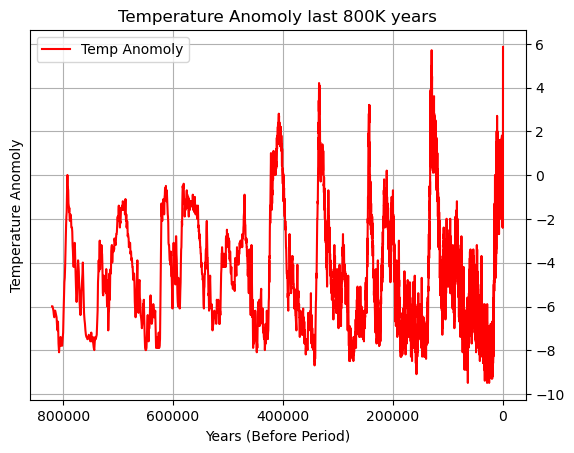

In [5]:
### Read in two datafiles

# Firstly we are going to look at both of the files

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  

# Read in First CSV file - Temperature file

TemperatureData  = pd.read_csv('FinalData/TemperatureAnomoly.csv')

fig, ax = plt.subplots()




# I also want to invert the x-axis

# Years (BP) - Where period is 1950

TemperatureData.plot(x="Year", y="Anomoly", ax=ax, label='Temp Anomoly',color='red')

# I also want to invert the x-axis

ax.invert_xaxis()
ax.yaxis.tick_right()
plt.title("Temperature Anomoly last 800K years")
plt.xlabel("Years (Before Period)")
plt.ylabel("Temperature Anomoly")
plt.grid(True)
plt.savefig('Images/Temperature Anomoly.png') # Save to PNG file
plt.show()





In [6]:
# Read in Excel File - CO2 Data

df = pd.read_excel('Roughwork/grl52461-sup-0003-supplementary.xls')

display(df)

,Composite of atmospheric CO2 records from Antarctic ice cores
0,NaN
1,Reference:
2,"Bereiter et al. (2014), Revision of the EPICA ..."
3,NaN
4,This new version of CO2 composite replaces the...
5,For details about the improvements relative to...
6,For detailed references of all records collect...
7,For latest anthropogenic data refer to NOAA/Ma...
8,Age unit is in years before present (yr BP) wh...
9,NaN
